In [11]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',
                  start=start_date,
                  end=end_date,
                  progress=False,
                  auto_adjust=False)

if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)   # remove the "AAPL" under each column


data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close",
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [12]:
data.tail()

Price,Date,Open,High,Low,Close,Adj Close,Volume
3438,2025-11-25,275.269989,280.380005,275.250000,276.970001,276.970001,46914200
3439,2025-11-26,276.959991,279.529999,276.630005,277.549988,277.549988,33431400
3440,2025-11-28,277.260010,279.000000,275.989990,278.850006,278.850006,20135600
3441,2025-12-01,278.010010,283.420013,276.140015,283.100006,283.100006,46587700
3442,2025-12-02,283.000000,287.399994,282.630005,286.190002,286.190002,53615500


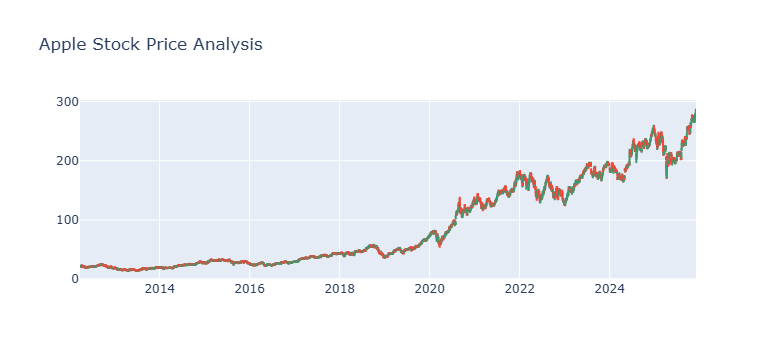

In [15]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                      open=data["Open"],
                                      high=data["High"],
                                      low=data["Low"],
                                      close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis",
                    xaxis_rangeslider_visible=False)

figure.show()

In [16]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Price
Close        1.000000
Adj Close    0.999962
High         0.999882
Low          0.999878
Open         0.999740
Date         0.930736
Volume      -0.536462
Name: Close, dtype: float64


In [20]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, ytrain, xtest, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

ModuleNotFoundError: No module named 'keras'